<a href="https://colab.research.google.com/github/eordog/erdos_artemis/blob/main/CNN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First, we start by importing all necessary packages

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from keras import layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from random import shuffle
from tqdm import tqdm
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

We determine the labels that will be used for classifying different types of tumors. "Back" refers to an MRI scan taken from the back of a patient, "top" is taken from above and "side" is from one side of the patient.

In [ ]:
labels = ['glioma_back', 'glioma_side', 'glioma_top', 'meningioma_back', 'meningioma_side', 'meningioma_top', 
           'no_back', 'no_side', 'no_top', 'pituitary_back', 'pituitary_side', 'pituitary_top']

We go through both training and testing set and merge them first, then convert the images into arrays. 

In [ ]:
X_train = []
y_train = []
image_size = 150
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/Colab_Notebooks/Brain_Tumor_Data_12_Categories','Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/Colab_Notebooks/Brain_Tumor_Data_12_Categories','Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        y_train.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)


100%|██████████| 10/10 [00:00<00:00, 120.46it/s]


We can see some sample images from each label.

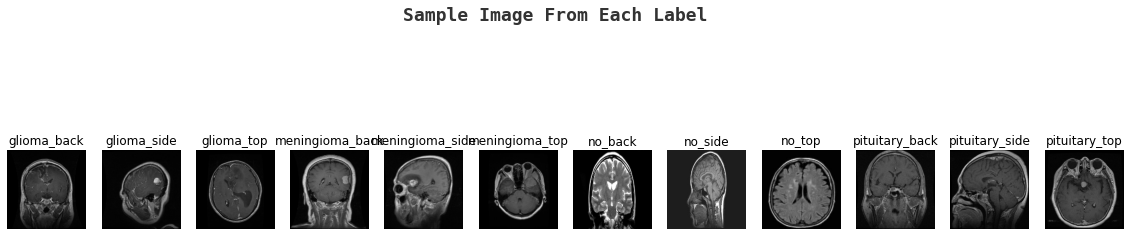

In [ ]:
k=0
fig, ax = plt.subplots(1,12,figsize=(20,20))
fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',
             fontname='monospace',y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

We perform a train-test split, reserving 10% of the training set to test our model.

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train, test_size=0.1,random_state=607)

Apply one hot encoding for all the labels.

In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

Here we create a convolutional neural network. First we create an empty architecture, then add layers to it. This baseline model contains 5 convolutional layers each followed by pooling layers. You can see the details of the architecture using model_name.summary() 

In [ ]:

cnn1 = Sequential()

cnn1.add( layers.Conv2D(32, (2,2), activation='sigmoid', input_shape=(150,150,3)) )
cnn1.add( layers.MaxPooling2D((2,2), strides=2))

cnn1.add(layers.Conv2D(64, (3,3), activation='sigmoid'))
cnn1.add(layers.MaxPooling2D((2,2), strides=2))

cnn1.add(layers.Conv2D(32, (3,3), activation='sigmoid'))
cnn1.add(layers.MaxPooling2D((2,2), strides=2))

cnn1.add(layers.Conv2D(32, (3,3), activation='sigmoid'))
cnn1.add(layers.MaxPooling2D((2,2), strides=2))

cnn1.add(layers.Conv2D(64, (2,2), activation='sigmoid'))
cnn1.add(layers.MaxPooling2D((2,2), strides=2))


cnn1.add(layers.Flatten())

cnn1.add(layers.Dense(44, activation='sigmoid'))
cnn1.add(layers.Dense(32, activation='sigmoid'))
cnn1.add(layers.Dense(12, activation='softmax'))

cnn1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 149, 149, 32)      416       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 34, 34, 32)        18464     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 17, 17, 32)      

We compile the model using the optimizer and loss functions given below.

In [ ]:
cnn1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

We fit the model on the training set, while separating 10% for validation. 

In [ ]:
history = cnn1.fit(X_train, y_train, validation_split= 0.1, epochs=100, batch_size= 32)

Epoch 1/100
83/83 [==============================] - 3s 30ms/step - loss: 2.4397 - accuracy: 0.1005 - val_loss: 2.4026 - val_accuracy: 0.1058
Epoch 2/100
83/83 [==============================] - 2s 22ms/step - loss: 2.4049 - accuracy: 0.1001 - val_loss: 2.4011 - val_accuracy: 0.1024
Epoch 3/100
83/83 [==============================] - 2s 22ms/step - loss: 2.4034 - accuracy: 0.1024 - val_loss: 2.3977 - val_accuracy: 0.1058
Epoch 4/100
83/83 [==============================] - 2s 22ms/step - loss: 2.4029 - accuracy: 0.1096 - val_loss: 2.3991 - val_accuracy: 0.1024
Epoch 5/100
83/83 [==============================] - 2s 23ms/step - loss: 2.4028 - accuracy: 0.1058 - val_loss: 2.3992 - val_accuracy: 0.1058
Epoch 6/100
83/83 [==============================] - 2s 23ms/step - loss: 2.4036 - accuracy: 0.1111 - val_loss: 2.4003 - val_accuracy: 0.1024
Epoch 7/100
83/83 [==============================] - 2s 22ms/step - loss: 2.4017 - accuracy: 0.1024 - val_loss: 2.3995 - val_accuracy: 0.1058
Epoch 

We can plot to see how accuracies change in the validation and training set as the model trains. This will help to make necessary modifications in the model.

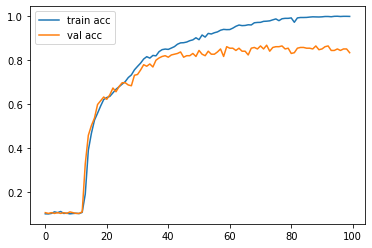

In [ ]:
plt.plot(history.history['accuracy'], label='train acc')

plt.plot(history.history['val_accuracy'], label='val acc')

plt.legend()

plt.show()

Similarly, we plot the loss function.

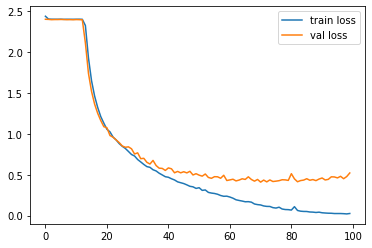

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

We observe that around 50 epochs, the accuracies stabilize in the validation set. Hence, we fit the model again using less epochs.

In [ ]:
history_new = cnn1.fit(X_train, y_train, validation_split= 0.1, epochs=50, batch_size= 64)

Epoch 1/50
42/42 [==============================] - 2s 45ms/step - loss: 0.0245 - accuracy: 0.9962 - val_loss: 0.4608 - val_accuracy: 0.8567
Epoch 2/50
42/42 [==============================] - 2s 40ms/step - loss: 0.0161 - accuracy: 0.9989 - val_loss: 0.4690 - val_accuracy: 0.8532
Epoch 3/50
42/42 [==============================] - 2s 39ms/step - loss: 0.0156 - accuracy: 0.9981 - val_loss: 0.5109 - val_accuracy: 0.8430
Epoch 4/50
42/42 [==============================] - 2s 40ms/step - loss: 0.0148 - accuracy: 0.9989 - val_loss: 0.4680 - val_accuracy: 0.8567
Epoch 5/50
42/42 [==============================] - 2s 39ms/step - loss: 0.0144 - accuracy: 0.9981 - val_loss: 0.5081 - val_accuracy: 0.8396
Epoch 6/50
42/42 [==============================] - 2s 39ms/step - loss: 0.0137 - accuracy: 0.9985 - val_loss: 0.4681 - val_accuracy: 0.8601
Epoch 7/50
42/42 [==============================] - 2s 40ms/step - loss: 0.0139 - accuracy: 0.9989 - val_loss: 0.5059 - val_accuracy: 0.8430
Epoch 8/50
42

Now, we can evaluate our model on the test set. We see that the model achieves an accuracy of 88%.

In [ ]:
cnn1.evaluate(X_test, y_test, batch_size=32)

11/11 [==============================] - 0s 9ms/step - loss: 0.4672 - accuracy: 0.8831


[0.4671665132045746, 0.8830769062042236]

We can get the predicted outcome on the rows using argmax.

In [ ]:
pred = cnn1.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

We can evalute the model using classification_report.

In [ ]:
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        26
           1       0.88      0.78      0.82        27
           2       0.91      0.94      0.92        31
           3       0.97      0.94      0.95        33
           4       0.74      0.82      0.78        28
           5       0.83      0.87      0.85        39
           6       1.00      0.50      0.67         6
           7       0.75      0.82      0.78        11
           8       0.83      0.93      0.88        42
           9       0.96      1.00      0.98        22
          10       0.88      0.85      0.86        26
          11       1.00      0.85      0.92        34

    accuracy                           0.88       325
   macro avg       0.89      0.85      0.86       325
weighted avg       0.89      0.88      0.88       325



Confusion matrix is a very useful tool which shows the misclassifications. 

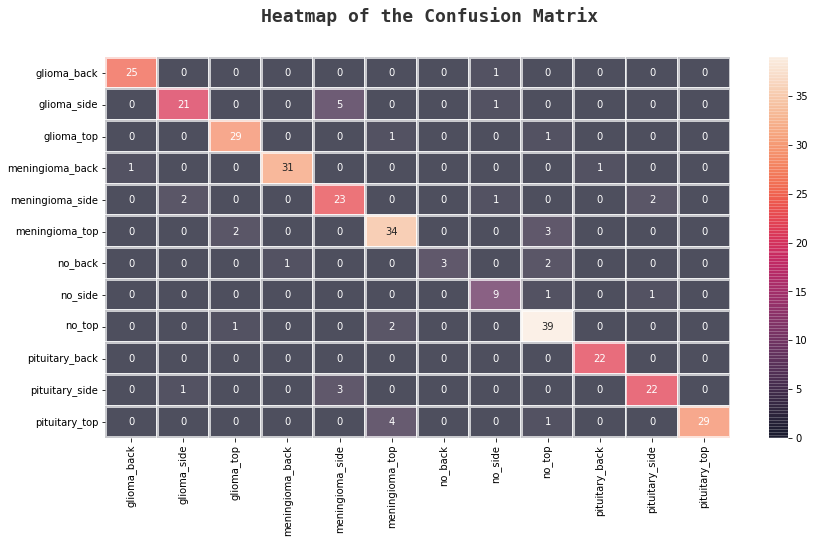

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(14,7))
sns.heatmap(confusion_matrix(y_test_new,pred),ax=ax,xticklabels=labels,yticklabels=labels,annot=True
        ,alpha=0.7,linewidths=2)
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',y=0.95,x=0.28,alpha=0.8)

plt.show()